In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sidetable 

**Pair Programming Limpieza III**

Antes de seguir, recordamos las preguntas que nos planteamos al principio del pair programming de EDA para dirigir nuestro análisis:

- ¿Es Australia es el sitio más peligroso y letal para estar relajada en la playa?

- ¿Cuál es el rango de edad que sufre la mayoría de los ataques?

- Independientemente de la edad, sufren los hombres más ataques que las mujeres?

- ¿En qué mes ocurren más ataques?

- ¿Cuál es la relación entre la especie y el tipo de ataque (si es fatal o no)?

- ¿Cómo han evolucionado los ataques a lo largo del tiempo?

De todo esto, nos damos cuenta que solo tenemos que limpiar algunas de las columnas, en concreto age, species, country, fatal, year, sex.

Si reducimos esto a una tabla para saber que tenemos ya limpito y que no.

**Actualizamos esta tabla ya que en el ejercicio de pair de Limpieza I ya dejamos algunas columnas limpitas:

variable
¿Está limpia?

age
✔️ esta en formato string cuando debería ser integer y en algunos casos tenemos rangos de edad

species
✔️ es un jaleo! Debemos unificar los nombres y reducir a las especies más importantes

country
✔️ los paises están en mayúsculas, algunos se repiten con algunos cambios

fatal
✔️ la limpiamos en el pair de Pandas V

year
✔️ es una columna de tipo float deberíamos convertirla a integer

sex
✔️ la limpiamos en el pair de Pandas V

fecha
✔️ la limpiamos en el pair de Pandas V

Ya hemos limpiado todas las columnas que parecía que no tenían el tipo de dato que queríamos o que tenían demasiada información. 

In [2]:
df = pd.read_csv("datos/limpieza_dos.csv", index_col = 0)
df.head()

,YEAR,COUNTRY,SEX_,AGE,SPECIES_,fecha,FATALIDAD,nueva_especie,edad_limpia
0,2018,usa,F,57,White shark,NaN,N,White,57.0
1,2018,brazil,M,18,Tiger shark,NaN,N,Tiger,18.0
2,2018,usa,M,15,"Bull shark, 6'",NaN,N,Bull,15.0
3,2018,australia,M,32,Grey reef shark,NaN,N,Grey,32.0
4,2018,england,M,21,Invalid incident,NaN,N,Desconocido,21.0


In [3]:
df2= df.drop (['AGE', 'SPECIES_'], axis=1)

In [4]:
df2.head(2)

,YEAR,COUNTRY,SEX_,fecha,FATALIDAD,nueva_especie,edad_limpia
0,2018,usa,F,NaN,N,White,57.0
1,2018,brazil,M,NaN,N,Tiger,18.0


En este ejercicio tendremos que limpiar los outliers:

1. ¿Sobre qué columnas podremos eliminar o reemplazar los outliers?

In [5]:
# sobre las numéricas.
df_numericas= df2.select_dtypes (include=np.number)
df_numericas
# YEAR y edad_limpia

,YEAR,edad_limpia
0,2018,57.0
1,2018,18.0
2,2018,15.0
3,2018,32.0
4,2018,21.0
...,...,...
1649,0,NaN
1657,0,NaN
1661,0,NaN
1670,0,NaN


2. Identifica visualmente los outliers.

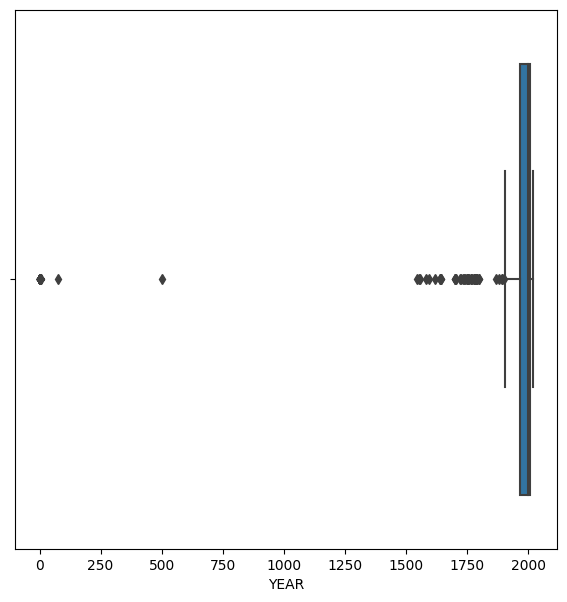

In [6]:
plt.figure (figsize =(7,7))
fig = sns.boxplot(x = "YEAR", data = df_numericas);

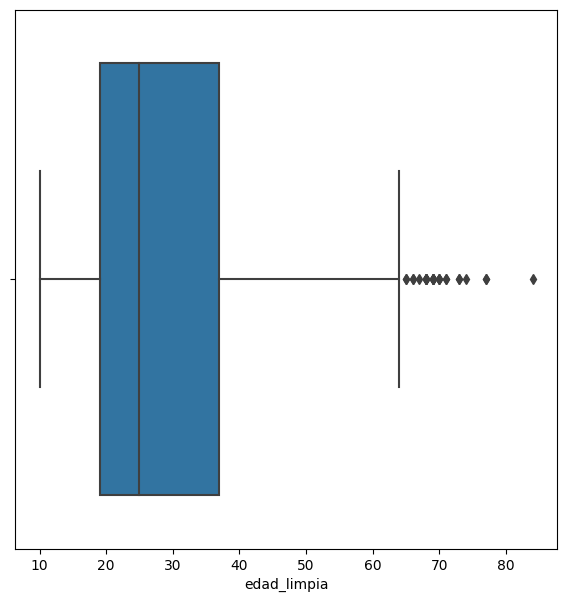

In [7]:
plt.figure (figsize =(7,7))
fig = sns.boxplot(x = "edad_limpia", data = df_numericas);

3. Identifica sobre el dataframe las filas que son outliers.

Definimos una función que nos permite sacar los índices de todos los registros que son outliers en cada una de las columnas numéricas del DF.

In [10]:
def outliers (lista_col, dataframe): 
    dicc_indices = {} 
 
    for col in lista_col:
        Q1 = np.nanpercentile(df2[col], 25)
        Q3 = np.nanpercentile(df2[col], 75)
        
        IQR = Q3 - Q1
        
        outlier_step = 1.5 * IQR
        
        outliers_data = df2[(df2[col] < Q1 - outlier_step) | (df2[col] > Q3 + outlier_step)]
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    return dicc_indices

Definimos una lista de columnas

In [11]:
lista_col=list (df_numericas.columns)
lista_col

['YEAR', 'edad_limpia']

Aplicamos y almacenamos los resultados.

In [12]:
indices= outliers (lista_col, df_numericas)
indices

{'YEAR': [1497,
  1498,
  1499,
  1500,
  1501,
  1502,
  1503,
  1504,
  1505,
  1506,
  1507,
  1508,
  1509,
  1510,
  1511,
  1512,
  1513,
  1514,
  1515,
  1516,
  1517,
  1518,
  1519,
  1520,
  1521,
  1522,
  1523,
  1524,
  1525,
  1526,
  1527,
  1528,
  1529,
  1530,
  1531,
  1532,
  1533,
  1534,
  1535,
  1536,
  1537,
  1538,
  1539,
  1540,
  1541,
  1542,
  1543,
  1544,
  1545,
  1546,
  1547,
  1548,
  1550,
  1551,
  1552,
  1553,
  1554,
  1555,
  1556,
  1557,
  1558,
  1559,
  1560,
  1562,
  1564,
  1565,
  1566,
  1567,
  1568,
  1569,
  1570,
  1572,
  1573,
  1574,
  1575,
  1577,
  1578,
  1579,
  1582,
  1583,
  1585,
  1586,
  1588,
  1589,
  1590,
  1591,
  1593,
  1594,
  1595,
  1596,
  1598,
  1602,
  1604,
  1607,
  1608,
  1609,
  1610,
  1611,
  1612,
  1613,
  1616,
  1617,
  1618,
  1621,
  1622,
  1623,
  1624,
  1625,
  1626,
  1627,
  1628,
  1632,
  1635,
  1636,
  1637,
  1639,
  1640,
  1641,
  1643,
  1644,
  1645,
  1646,
  1647,
  1648,


4. Reemplaza los outliers por el estadístico más correcto.

Para extraer los valores iteramos por los diccionarios resultantes de la función. Calculamos la media para cada columna e iteramos por los valores para reemplazarlos.

In [13]:

for k, v in indices.items():
    media = df2[k].mean() 
    for i in v: 
        df2.loc[i,k] = media 

In [14]:
df2.select_dtypes (include=np.number)

,YEAR,edad_limpia
0,2018.000000,57.0
1,2018.000000,18.0
2,2018.000000,15.0
3,2018.000000,32.0
4,2018.000000,21.0
...,...,...
1649,1884.108025,NaN
1657,1884.108025,NaN
1661,1884.108025,NaN
1670,1884.108025,NaN


Antes de terminar el ejercicio, cambiamos los tipo de las columnas de float a interger y unificamos los nombres en df2.

In [15]:
df2['YEAR']= df2['YEAR'].astype (int)

In [16]:
df2['edad_limpia']= df2['edad_limpia'].astype (int, errors = "ignore")

In [17]:
df2.dtypes

YEAR               int32
COUNTRY           object
SEX_              object
fecha             object
FATALIDAD         object
nueva_especie     object
edad_limpia      float64
dtype: object

No nos deja cambiar el tipo porque hay Nan y para poder seguir adelante y dejar la columna lista para siguientes ejercicios, los eliminamos.

In [21]:
df2['edad_limpia']= df2['edad_limpia'].dropna (how=any, axis=0)

In [22]:
df2['edad_limpia'].unique

<bound method Series.unique of 0       57.0
1       18.0
2       15.0
3       32.0
4       21.0
        ... 
1649     NaN
1657     NaN
1661     NaN
1670     NaN
1671    15.0
Name: edad_limpia, Length: 1620, dtype: float64>

In [20]:
df2['edad_limpia']= df2['edad_limpia'].astype (int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:
#en un primer intento nos dejá, después nos sigue dando error. Dejamos el código por si acaso.

Además, unificamos los nombres de las col para dejar el DF2 listo para las siguientes lecciones.

In [23]:
df2.columns

Index(['YEAR', 'COUNTRY', 'SEX_', 'fecha', 'FATALIDAD', 'nueva_especie',
       'edad_limpia'],
      dtype='object')

In [24]:
df2.columns= df2.columns.str.lower()

In [25]:
df2.columns

Index(['year', 'country', 'sex_', 'fecha', 'fatalidad', 'nueva_especie',
       'edad_limpia'],
      dtype='object')

In [26]:
df2.head(2)

,year,country,sex_,fecha,fatalidad,nueva_especie,edad_limpia
0,2018,usa,F,NaN,N,White,57.0
1,2018,brazil,M,NaN,N,Tiger,18.0


5. Guarda el csv con las columnas limpias para seguir trabajando con este dataframe limpio en el siguiente pair programming de limpieza.

In [28]:
df2.to_csv("datos/limpieza_tres.csv")